In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import numpy as np
from joblib import dump, load

Read csv

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_1w_10min.csv',parse_dates=['timestamp']).set_index('timestamp')
df2 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_3w_30min.csv',parse_dates=['timestamp']).set_index('timestamp')
df3 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_3w_90min.csv',parse_dates=['timestamp']).set_index('timestamp')


Model, parameters and cross-validation definition

In [ ]:
cv_n=30
dataframes = [df1, df2, df3]
scenarios = ["10min","10min+10min+10min","10min+20min+60min"]
regr=RandomForestRegressor()
regr.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Iterate cross validation for the 3 scenarios

KeyboardInterrupt: ignored

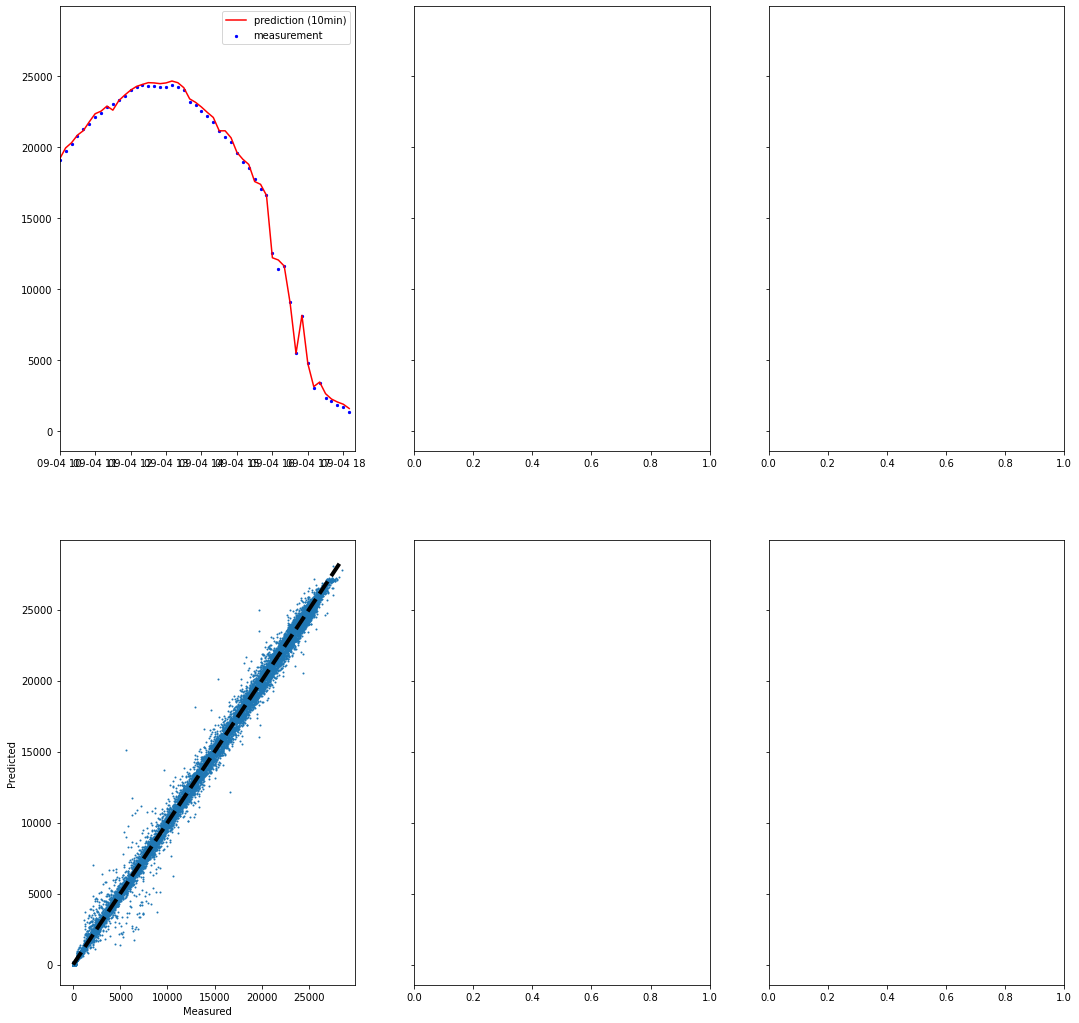

In [ ]:
benchmark_error=np.empty([3, 3])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 18), sharey=True)
xplot_min = 12570
xplot_max = 12620

for ix,df in enumerate(dataframes): 
  X = df.drop('Pa1', axis=1)
  y = df['Pa1']

  scores_predict = cross_val_predict(regr, X, y, cv=cv_n)

  benchmark_error[ix][0] = mean_squared_error(y,scores_predict,squared=False)
  benchmark_error[ix][1] = mean_absolute_error(y,scores_predict)
  benchmark_error[ix][2] = r2_score(y,scores_predict)

  axes[0,ix].scatter(X.index[xplot_min:xplot_max],y[xplot_min:xplot_max],color="blue",label="measurement",s=5)
  axes[0,ix].plot(X.index[xplot_min:xplot_max],scores_predict[xplot_min:xplot_max], color="red",label="prediction ("+scenarios[ix]+")")
  axes[0,ix].legend()
  axes[0,ix].set_xlim(X.index[xplot_min],X.index[xplot_max])
  axes[1,ix].set_xlabel('Time')
  axes[1,ix].set_ylabel('Power')  

  axes[1,ix].scatter(y, scores_predict, s=1)
  axes[1,ix].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
  axes[1,ix].set_xlabel('Measured')
  axes[1,ix].set_ylabel('Predicted')  

fig.autofmt_xdate()
plt.show()


Error Metrics

In [ ]:
benchmark_err_df_headers=["RMSE (W)","MAE (W)", "r2"]
benchmark_err_df = pd.DataFrame(data=benchmark_error,index=scenarios,columns=benchmark_err_df_headers)
benchmark_err_df.to_csv('../results/randomforest_error_bm.csv')
benchmark_err_df


Performance 

In [ ]:
benchmark_performance=np.empty([3, 3])

for ix,df in enumerate(dataframes): 
  X = df.drop('Pa1', axis=1)
  y = df['Pa1']

  scores_eval = cross_validate(regr, X, y, cv=cv_n)

  benchmark_performance[ix][0] = scores_eval['fit_time'].mean()
  benchmark_performance[ix][1] = scores_eval['score_time'].mean()
  benchmark_performance[ix][2] = scores_eval['test_score'].mean()




Performance metrics

In [ ]:
benchmark_perf_df_headers=["fit_time (s)","score_time (s)","test_score"]
benchmark_perf_df = pd.DataFrame(data=benchmark_performance,index=scenarios,columns=benchmark_perf_df_headers)
benchmark_perf_df.to_csv('../results/randomforest_performance_bm.csv')
benchmark_perf_df

